<a href="https://colab.research.google.com/github/YazhiniRaja27/Image-Contour-Explorer/blob/main/Image_Contour_Explorer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Image Contour Explorer** focuses on fundamental image processing techniques to identify and highlight significant shapes within an image. It involves loading an image, converting it to grayscale, applying Gaussian blur for noise reduction, and then using the Canny edge detector to find edges. The core functionality is to detect contours from these edges, specifically isolating and approximating the largest contour into a simplified polygon. The epsilon parameter plays a crucial role in controlling the precision of this approximation, allowing for experimentation with how accurately the contour is represented. The final output includes a visualization of the original image with the approximated contour drawn on it, and the modified image is saved.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


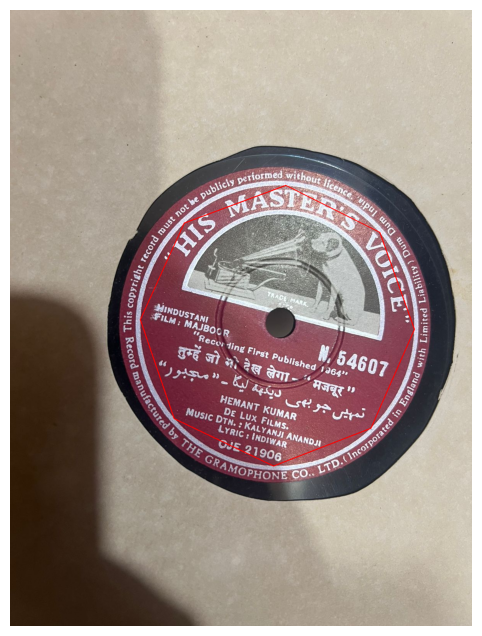

False

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/drive/MyDrive/1.jpg"
img = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Find edges using Canny edge detector
edges = cv2.Canny(blurred, 50, 150)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest circular contour
largest_contour = max(contours, key=cv2.contourArea)

# Approximate the contour to a polygon
epsilon = 0.04 * cv2.arcLength(largest_contour, True)
approx = cv2.approxPolyDP(largest_contour, epsilon, True)

# Draw the approximated contour in red
cv2.drawContours(img, [approx], -1, (0, 0, 255), 2)

# Display the image with the contour
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

# Save the modified image if needed
cv2.imwrite("/content/drive/image_with_contour.jpg", img)


In [ ]:
epsilon = 0.005 * cv2.arcLength(largest_contour, True)

In [ ]:
epsilon

11.954549681544304